<a href="https://colab.research.google.com/github/thitiwat05/229352-StatisticalLearning-or-Statistical-Learning-Labs./blob/main/Lab07_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances_` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

In [1]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier

In [3]:
from sklearn.ensemble import AdaBoostClassifier


ab = AdaBoostClassifier()
ab.fit(X, y)
ab.feature_importances_

array([0.        , 0.05832968, 0.41431393, 0.5273564 ])

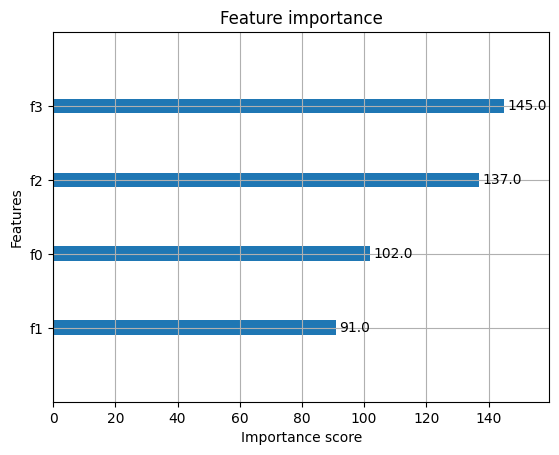

In [4]:
from xgboost import XGBClassifier, plot_importance


model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


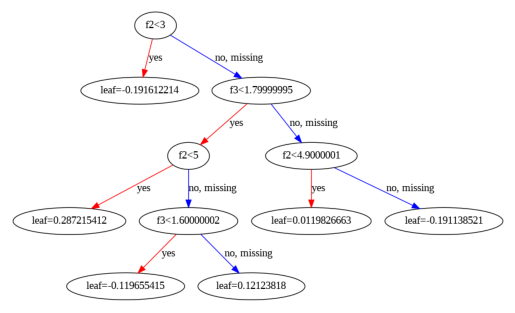

In [6]:
from xgboost import plot_tree

plot_tree(model, num_trees=4);

In [7]:
import pandas as pd

X_train = pd.read_csv('X_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None).values.ravel()

X_test = pd.read_csv('X_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None).values.ravel()

**Adaboost**

In [8]:
ada = AdaBoostClassifier(random_state=42)

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_ada = GridSearchCV(
    ada,
    param_grid_ada,
    cv=5,
    scoring='accuracy'
)

grid_ada.fit(X_train, y_train)

print("AdaBoost best CV accuracy:", grid_ada.best_score_)
print("Best parameters:", grid_ada.best_params_)

AdaBoost best CV accuracy: 0.8441860465116278
Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [9]:
ada_best = grid_ada.best_estimator_
y_pred_ada = ada_best.predict(X_test)

print("AdaBoost test accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost test accuracy: 0.8461538461538461


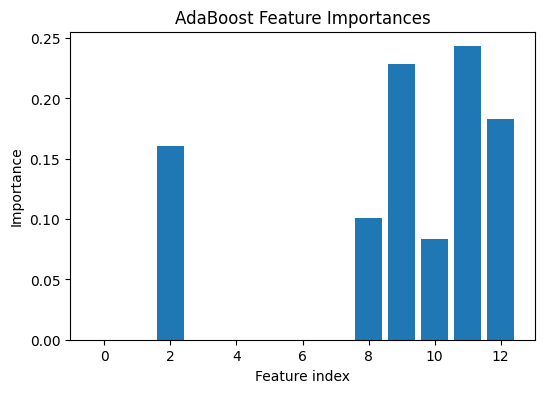

In [10]:
plt.figure(figsize=(6,4))
plt.bar(range(X_train.shape[1]), ada_best.feature_importances_)
plt.xlabel("Feature index")
plt.ylabel("Importance")
plt.title("AdaBoost Feature Importances")
plt.show()

In [11]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

grid_xgb = GridSearchCV(
    xgb,
    param_grid_xgb,
    cv=5,
    scoring='accuracy'
)

grid_xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:52:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:52:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:52:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:52:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:52:30] WARNING: /w

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

**XGboost**

In [12]:
print("XGBoost best CV accuracy:", grid_xgb.best_score_)
print("Best parameters:", grid_xgb.best_params_)

XGBoost best CV accuracy: 0.8110741971207089
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [13]:
xgb_best = grid_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)

print("XGBoost test accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost test accuracy: 0.8241758241758241


<Figure size 600x400 with 0 Axes>

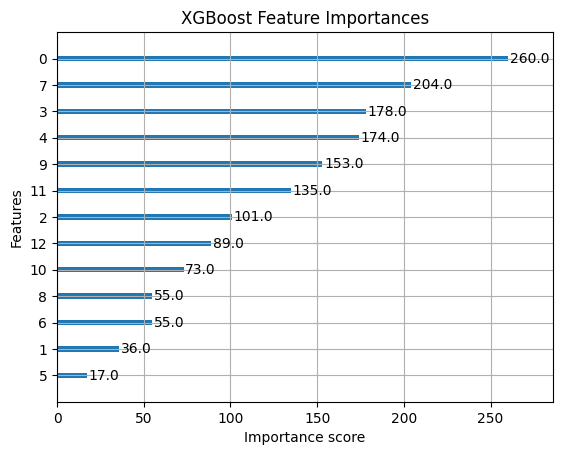

In [14]:
plt.figure(figsize=(6,4))
plot_importance(xgb_best)
plt.title("XGBoost Feature Importances")
plt.show()

**Light GBM**

In [15]:
lgbm = LGBMClassifier(random_state=42)

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, -1],
    'learning_rate': [0.05, 0.1]
}

grid_lgbm = GridSearchCV(
    lgbm,
    param_grid_lgbm,
    cv=5,
    scoring='accuracy'
)

grid_lgbm.fit(X_train, y_train)

print("LightGBM best CV accuracy:", grid_lgbm.best_score_)
print("Best parameters:", grid_lgbm.best_params_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [16]:
lgbm_best = grid_lgbm.best_estimator_
y_pred_lgbm = lgbm_best.predict(X_test)

print("LightGBM test accuracy:", accuracy_score(y_test, y_pred_lgbm))

LightGBM test accuracy: 0.8131868131868132


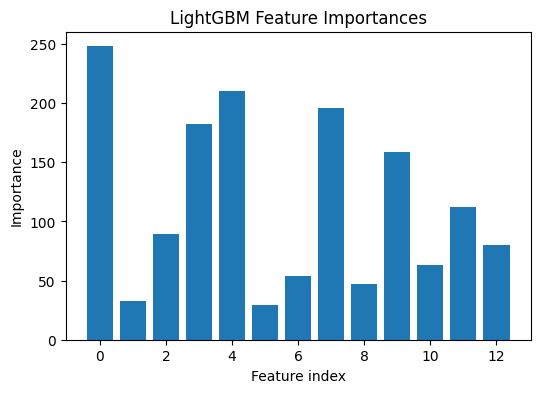

In [17]:
import matplotlib.pyplot as plt
import numpy as np

importances = lgbm_best.feature_importances_

plt.figure(figsize=(6,4))
plt.bar(range(len(importances)), importances)
plt.xlabel("Feature index")
plt.ylabel("Importance")
plt.title("LightGBM Feature Importances")
plt.show()

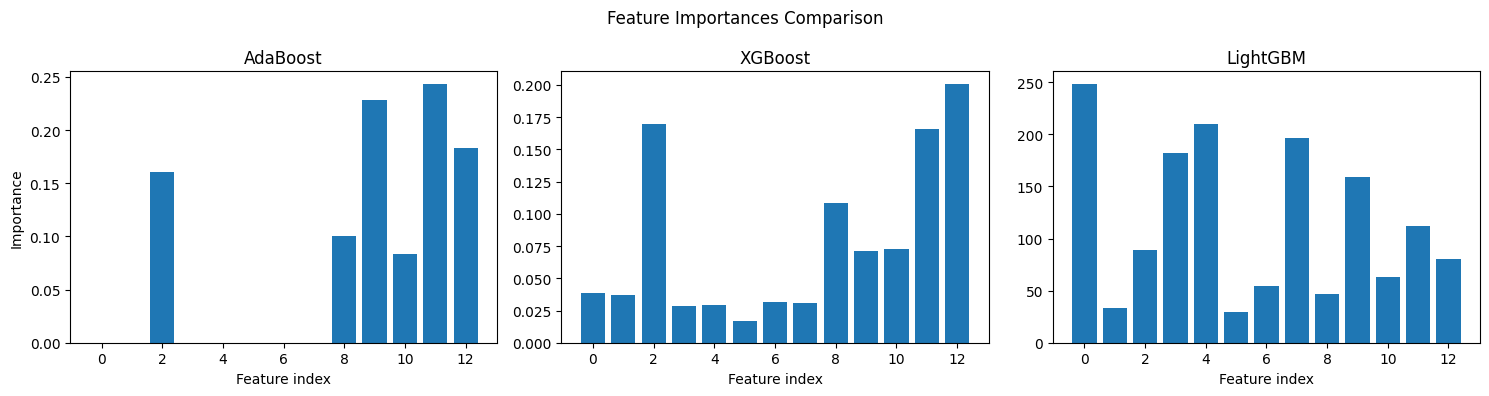

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

ada_importance = ada_best.feature_importances_
axes[0].bar(range(len(ada_importance)), ada_importance)
axes[0].set_title("AdaBoost")
axes[0].set_xlabel("Feature index")
axes[0].set_ylabel("Importance")

xgb_importance = xgb_best.feature_importances_
axes[1].bar(range(len(xgb_importance)), xgb_importance)
axes[1].set_title("XGBoost")
axes[1].set_xlabel("Feature index")

lgbm_importance = lgbm_best.feature_importances_
axes[2].bar(range(len(lgbm_importance)), lgbm_importance)
axes[2].set_title("LightGBM")
axes[2].set_xlabel("Feature index")

plt.suptitle("Feature Importances Comparison")
plt.tight_layout()
plt.show()

ANS : AdaBoost ให้ประสิทธิภาพดีที่สุด